In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_rider_df = pd.merge(city_df, ride_df, on='city')

# Display the data table for preview

In [6]:
city_rider_df = city_rider_df[['city','date','fare', 'ride_id', 'driver_count' , 'type']]
city_rider_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

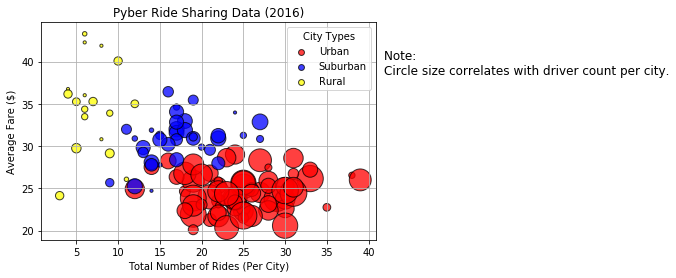

In [33]:
# Obtain the x and y coordinates for each of the three city types
urban_rides = city_rider_df.loc[city_rider_df['type'] == 'Urban'].groupby('city')['driver_count'].count()
urban_fare = city_rider_df.loc[city_rider_df['type'] == 'Urban'].groupby('city')['fare'].mean()

suburban_rides = city_rider_df.loc[city_rider_df['type'] == 'Suburban'].groupby('city')['driver_count'].count()
suburban_fare = city_rider_df.loc[city_rider_df['type'] == 'Suburban'].groupby('city')['fare'].mean()

rural_rides = city_rider_df.loc[city_rider_df['type'] == 'Rural'].groupby('city')['driver_count'].count()
rural_fare = city_rider_df.loc[city_rider_df['type'] == 'Rural'].groupby('city')['fare'].mean()

urban_size = city_rider_df.loc[city_rider_df['type'] == 'Urban'].groupby('city')['driver_count'].mean() * 10
suburban_size = city_rider_df.loc[city_rider_df['type'] == 'Suburban'].groupby('city')['driver_count'].mean() * 10
rural_size = city_rider_df.loc[city_rider_df['type'] == 'Rural'].groupby('city')['driver_count'].mean() * 10


# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, s = urban_size, c='red', alpha = .75, edgecolor = 'black', label='Urban')
plt.scatter(suburban_rides, suburban_fare, s = suburban_size, c='blue', alpha = .75, edgecolor = 'black', label='Suburban')
plt.scatter(rural_rides, rural_fare, s = rural_size, c='yellow', alpha = .75, edgecolor = 'black', label='Rural')

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')

# Create a legend
lgnd = plt.legend(loc='best', title='City Types')

for handle in lgnd.legendHandles:
    handle.set_sizes([35])
    
# Incorporate a text label regarding circle size
note = "Note: \nCircle size correlates with driver count per city."
plt.text(.92, 0.7, note, fontsize=12, transform=plt.gcf().transFigure)


# Save Figure
plt.savefig('figures/ride_data.png', bbox_inches="tight")

plt.show()

## Total Fares by City Type

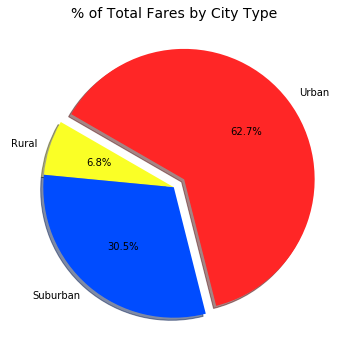

In [26]:
# Calculate Type Percents
total_fares = city_rider_df.groupby('type')['fare'].sum()
city_types = total_fares.keys()

# Build Pie Chart
plt.figure(figsize=(6,6))
pie_plot = plt.pie(total_fares, labels=city_types, colors=['#faff26', '#004cff', '#ff2626'], explode=(0, 0, 0.1), 
                   startangle=150, autopct="%1.1f%%", shadow=True, )

title = plt.title("% of Total Fares by City Type", fontdict={'fontsize':14})

# Save Figure
plt.savefig('figures/total_fares.png')

plt.show()

## Total Rides by City Type

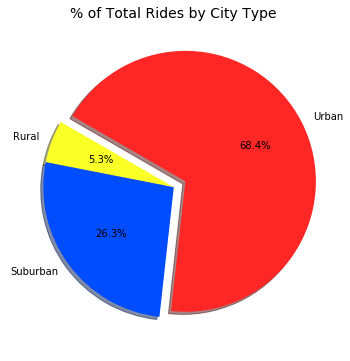

In [25]:
# Calculate Ride Percents
total_rides = city_rider_df.groupby('type')['driver_count'].count()
city_types = total_rides.keys()

# Build Pie Chart
plt.figure(figsize=(6,6))
pie_plot = plt.pie(total_rides, labels=city_types, colors=['#faff26', '#004cff', '#ff2626'], explode=(0, 0, 0.1), 
                   startangle=150, autopct="%1.1f%%", shadow=True, )

title = plt.title("% of Total Rides by City Type", fontdict={'fontsize':14})

# Save Figure
plt.savefig('figures/total_rides.png')

plt.show()

## Total Drivers by City Type

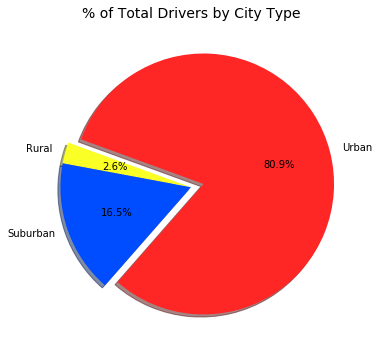

In [27]:
# Calculate Driver Percents
total_drivers = city_df.groupby('type')['driver_count'].sum()
city_types = total_drivers.keys()

# Build Pie Charts
plt.figure(figsize=(6,6))
pie_plot = plt.pie(total_drivers, labels=city_types, colors=['#faff26', '#004cff', '#ff2626'], explode=(0, 0, 0.1), 
                   startangle=160, autopct="%1.1f%%", shadow=True, )

title = plt.title("% of Total Drivers by City Type", fontdict={'fontsize':14})

# Save Figure
plt.savefig('figures/total_drivers.png')

plt.show()

## Observable Trends

- Most of the drivers are in urban cities at 80.9%. 
- From the bubble plot, the higher number of rides per city correlates with a lower average fare.
- From the bubble plot, the average fare is the highest in rural cities, then it's the secound highest in suburban cities, and
  it's the lowest in urban cities.